In [99]:
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import pandas as pd
import numpy as np

## 1. Load the Karate Graph from NetworkX

In [5]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Available nodes:", list(graph.nodes))
    print("Available edges:", list(graph.edges))
    if type(graph) == nx.classes.digraph.DiGraph:
        print("Connected components:", 
              list(nx.weakly_connected_components(directed_graph)))
    else:
        print("Connected components:", list(nx.connected_components(graph)))
    print("Node degree:", dict(graph.degree()))

In [6]:
# built-in graph from networkx
karate_graph = nx.karate_club_graph()
get_graph_info(karate_graph)

Number of nodes: 34
Number of edges: 78
Available nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Available edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
Connected components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

In [75]:
# club color reference
nation_color_dict = {
    'Mr. Hi': '#aff8df',
    'Officer': '#ffcbc1'
}

# function to assign color for node visualization
def create_node_colors_from_graph(graph, club_color_dict):
    node_colors = []
    for node, club in list(graph.nodes(data="club")):
        if club in club_color_dict:
            node_colors.append(club_color_dict[club])
    return node_colors

# get node colors for plotting
node_colors = create_node_colors_from_graph(karate_graph, nation_color_dict)

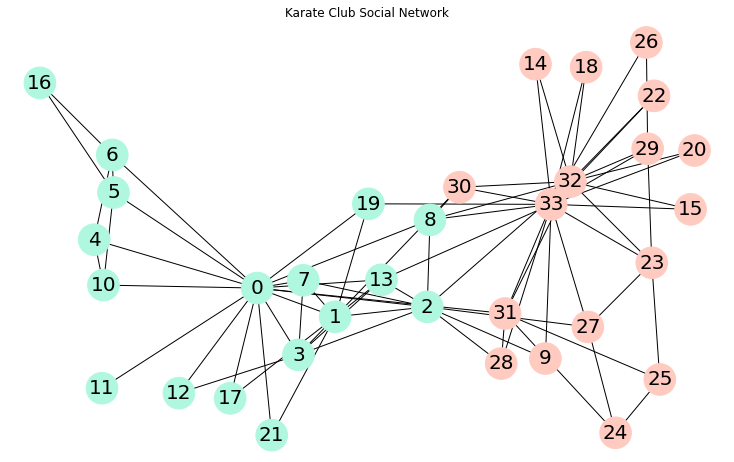

In [77]:
# create visualization
pos = nx.spring_layout(karate_graph, 
                       k=0.3, iterations=50,
                       seed=2)

plt.figure(1,figsize=(10,6)) 
nx.draw(karate_graph,
        pos = pos,
        node_color=node_colors,
        node_size=1000,
        with_labels=True,
        font_size = 20,
        font_color='black')
plt.title("Karate Club Social Network")
plt.show()

### Mint color nodes are from the "Mr. Hi" Karate club and the Salmon color nodes are from the "Officer" Karate club. 

## Description Statistics:

## 2. Tradic Closure
The tendency for people who share connections in a social network to become connected

### 2.1 Local Clustering Coefficient (LCC)

1. Definition: Fractions of pairs of the node’s friends are friends with each other
2. Interpretation: How likely a node’s friends are connected to each other

In [78]:
# get the local cluster coefficient dataframe
def get_local_cluster_coefficient(graph):
    LCC_df = pd.DataFrame(sorted(nx.clustering(graph).items(), 
                                 key=lambda item: -item[1]), 
                      columns=["node", "LCC"])
    return LCC_df

In [149]:
# find nodes with LCC score of > 0.5:
# means that > 50% of change a node n's friends are friends of each other
node_data = dict(karate_graph.nodes(data="club"))
LCC_df = get_local_cluster_coefficient(karate_graph)
LCC_df["club"] = [node_data[node] for node in LCC_df["node"]]

# output the dataframe of LCC
print(round(100 * len(LCC_df.query("LCC > 0.5")) / len(LCC_df), 1),
      "% of the nodes have Local Cluster Coefficients > 0.5")
LCC_df.query("LCC > 0.5")

47.1 % of the nodes have Local Cluster Coefficients > 0.5


,node,LCC,club
0,7,1.000000,Mr. Hi
1,12,1.000000,Mr. Hi
2,14,1.000000,Officer
3,15,1.000000,Officer
4,16,1.000000,Mr. Hi
5,17,1.000000,Mr. Hi
6,18,1.000000,Officer
7,20,1.000000,Officer
8,21,1.000000,Mr. Hi
9,22,1.000000,Officer


In [124]:
LCC_df.club.value_counts()

Mr. Hi     17
Officer    17
Name: club, dtype: int64

#### Both clubs have 17 nodes with LCC > 0.5, which implies their friends have > 50% of chance being friends of each other.

### Let's look at the sub graph with node 7, which has LCC of 1 because all its neighbors are friends of each other.

In [138]:
# function to return a node's neighbor nodes as a list
def get_neighbors(graph, node):
    return [n for n in graph.neighbors(node)]

Neighbors of node 7: [0, 1, 2, 3]


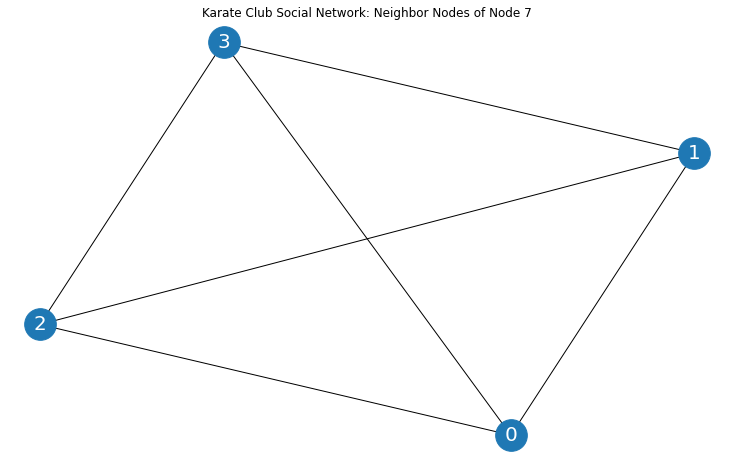

In [142]:
neighbor_nodes = get_neighbors(karate_graph, 7)
print("Neighbors of node 7:", neighbor_nodes)

# get subgraph
subgraph = karate_graph.subgraph(neighbor_nodes)

# create visualization
pos = nx.spring_layout(subgraph, 
                       k=0.3, iterations=50,
                       seed=2)

plt.figure(1,figsize=(10,6)) 
nx.draw(subgraph,
        pos = pos,
        node_size=1000,
        with_labels=True,
        font_size = 20,
        font_color='white')
plt.title("Karate Club Social Network: Neighbor Nodes of Node 7")
plt.show() 

### 2.2 Global Clustering Coefficient (GCC)

1. Definition: Measuring how likely the nodes are going to cluster on the whole network


### 2.2.2 Average local clustering coefficient: 
1. Definition: Average local clustering coefficient over all nodes in the graph.
2. Interpretation:  Overall, what’s the probability of adjacent nodes being connected.

In [151]:
# compute using the already calculated LCC dataframe
np.mean(LCC_df["LCC"])

0.5706384782076824

In [152]:
# compute using the average_clustering() function
nx.average_clustering(karate_graph)

0.5706384782076823

#### Overall, the probability of adjacent nodes being connected is 57.06%.

### 2.2.3 Transitivity:
1. Definition: Ratio of number of triangles and number of “open triads” in a network
2. Interpretation: Overall, what’s the probability of triangles formed over all the possible triangles in the network

In [153]:
nx.transitivity(karate_graph)

0.2556818181818182

#### Overall, the probability of triangles formed over all the possible triangles in the network is 25.57%